# Project 3: Binary Logistic Regression

## Setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Step 0: Define function_0 to normalize the dataset

In [2]:
# Function for Normalizing Dataset

# input_feature_norm = function_0(input_feature)

def function_0(input_feature):     
    
    # Normalizing input_features 
    input_feature_norm = input_feature / np.sqrt( np.sum(input_feature**2, axis=0) )
    
    return input_feature_norm

## Step 1: Define function_1 to predict the model output

In [3]:
# Function for Predicting Output

# predicted_output_binary = function_1(input_feature, weight)

def function_1(input_feature, weight):

    # Calculation Score & Probability for train & test feature
    input_score = np.dot(input_feature,weight)
    P_input = 1 / (1 + np.e**(-input_score)) # Sigmoid function
    
    # Converting probabilities to predictions
    predicted_output_binary = np.where(P_input >= 0.5 ,1,0)
    
    return predicted_output_binary

## Step 2: Define function_2 to calculating model accuracy

In [4]:
# Function for Calculating Model Accuracy

# accuracy = function_2(predicted_output_binary, output_binary):

def function_2(predicted_output_binary, output_binary):
    
    # Evaluation predictions: true predictions = 1; false predictions = 0
    output_compare = np.where((output_binary - predicted_output_binary) == 0 ,1,0)

    # Calculating prediction accuracy
    accuracy = np.sum(output_compare) / output_compare.shape[0]
    
    return accuracy

## Step 3: Define function_3 to Estimating and Printing Logistic Regression Coefficients

In [5]:
# Function for Estimating and Printing Logistic Regression Coefficients

# weight, train_accuracy_history, test_accuracy_history = 
# function_3(train_feature, train_output, test_feature, test_output, weight0, learning_rate, tolerance)

def function_3(train_feature, train_output, test_feature, test_output, weight0, learning_rate, tolerance):
    
    
    # History of accuracies
    train_accuracy_history = []
    test_accuracy_history = []
    
    # Initial weight & tolerance & iteration #
    weight = weight0
    tolerance_k = 10*tolerance
    k = 0

    while tolerance_k > tolerance and k < 20000:
        
        # Count iterations
        k=k+1

        
        # Calculation Score & Probability for train & test feature
        train_score = np.dot(train_feature,weight)
        P_train = 1 / (1 + np.e**(-train_score)) # Sigmoid function
        
        test_score = np.dot(test_feature,weight)
        P_test = 1 / (1 + np.e**(-test_score)) # Sigmoid function
        

        # Using model to predict train and test labels
        predicted_train_output_binary = function_1(train_feature, weight)
        predicted_test_output_binary = function_1(test_feature, weight)

        # Calculating train and test acuuracies (correct prections/total predictions)
        train_accuracy = function_2(predicted_train_output_binary, train_output_binary)
        test_accuracy = function_2(predicted_test_output_binary, test_output_binary)

        
        # Save accuracies for each iteration.
        train_accuracy_history.append(train_accuracy)
        test_accuracy_history.append(test_accuracy)
        
        # Calculate the gradiant.
        J = train_feature.T.dot(train_output - P_train)
        
        # Update tolerance
        tolerance_k = (np.sum(J ** 2))**0.5
        
        # Update weights
        weight = weight + learning_rate * J

    
    train_accuracy_history = np.array(train_accuracy_history)
    test_accuracy_history = np.array(test_accuracy_history)
    
    print(f'\nFinal estimated weights = w0:{weight[0]}, w1:{weight[1]}')

    
    return weight, train_accuracy_history, test_accuracy_history

## Step 4: Import fish data from Fish.csv

In [6]:
# Importing fish data from Fish.csv
df = pd.read_csv (r'../data/Fish.csv')  
print('Dataset Summary:')
print(f'\nObesity dataset imported with following columns \n{list(df.columns)}')

# Converting Panda data to Numpy data
data = df.to_numpy()
np.random.shuffle(data)
np.random.shuffle(data)

# Spliting features and labels
fish_weights = data[:,1].astype(np.float32)
fish_features = data[:,2:7].astype(np.float32) # 'Length1', 'Length2', 'Length3', 'Height', 'Width'
fish_features = np.c_[fish_features, fish_weights] # 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight'
fish_spec = data[:,0]#.astype(np.str)
fish_spec = np.expand_dims(fish_spec, axis=1)


# Spliting train and test data
all_train_feature, all_test_feature, train_output, test_output = \
train_test_split(fish_features, fish_spec, test_size=0.2, stratify=data[:,0])


# Dataset Summary
print(f'\nTrain dataset: all_train_feature: {all_train_feature.shape};  train_output: {train_output.shape}')
print(f'Test dataset: all_test_feature {all_test_feature.shape}; test_output: {test_output.shape}')

Dataset Summary:

Obesity dataset imported with following columns 
['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

Train dataset: all_train_feature: (127, 6);  train_output: (127, 1)
Test dataset: all_test_feature (32, 6); test_output: (32, 1)


## Step 5: Use function_1 to train ‘One vs All’ binary classification models | Models A, B, C, D, E, F

### Step 5 : Model A (Length1)

*****************************************************************************
*****************************************************************************

Performance of Model A (Length1) for Class (Bream):

Final estimated weights = w0:[-5.86343818], w1:[-3.94538763]

Final Train Accuracy = 0.7795275590551181; Final Test Accuracy = 0.78125;


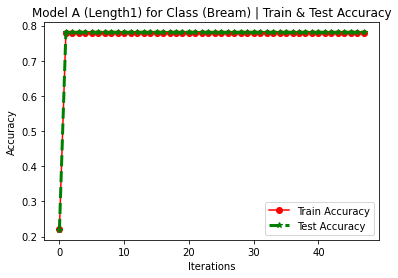

*****************************************************************************
*****************************************************************************

Performance of Model A (Length1) for Class (Parkki):

Final estimated weights = w0:[-11.39223438], w1:[-11.07365656]

Final Train Accuracy = 0.9291338582677166; Final Test Accuracy = 0.9375;


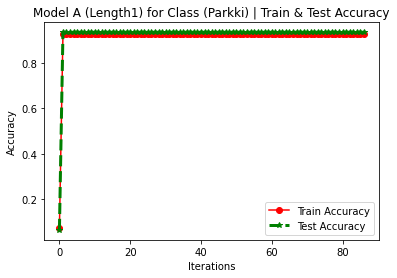

*****************************************************************************
*****************************************************************************

Performance of Model A (Length1) for Class (Perch):

Final estimated weights = w0:[-2.01718391], w1:[-1.99668142]

Final Train Accuracy = 0.6456692913385826; Final Test Accuracy = 0.65625;


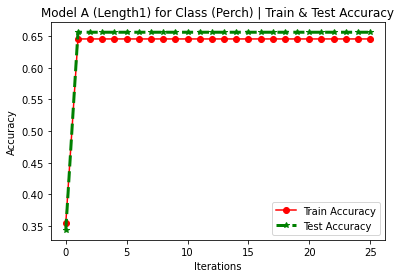

*****************************************************************************
*****************************************************************************

Performance of Model A (Length1) for Class (Pike):

Final estimated weights = w0:[-11.17485928], w1:[-5.75055766]

Final Train Accuracy = 0.8976377952755905; Final Test Accuracy = 0.875;


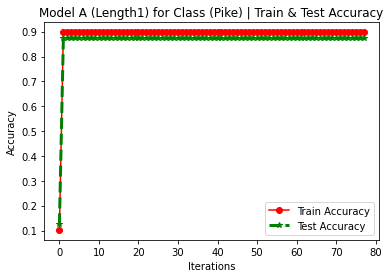

*****************************************************************************
*****************************************************************************

Performance of Model A (Length1) for Class (Roach):

Final estimated weights = w0:[-8.76969761], w1:[-9.02886595]

Final Train Accuracy = 0.8740157480314961; Final Test Accuracy = 0.875;


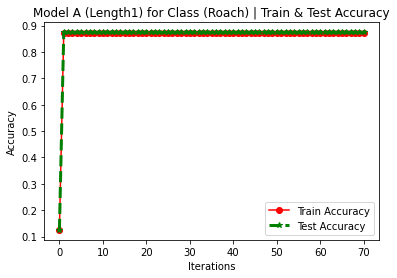

*****************************************************************************
*****************************************************************************

Performance of Model A (Length1) for Class (Smelt):

Final estimated weights = w0:[-10.50339882], w1:[-12.22160809]

Final Train Accuracy = 0.9133858267716536; Final Test Accuracy = 0.90625;


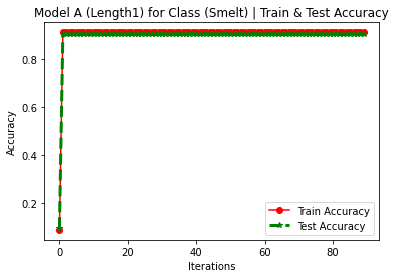

*****************************************************************************
*****************************************************************************

Performance of Model A (Length1) for Class (Whitefish):

Final estimated weights = w0:[-13.48215317], w1:[-11.55201888]

Final Train Accuracy = 0.9606299212598425; Final Test Accuracy = 0.96875;


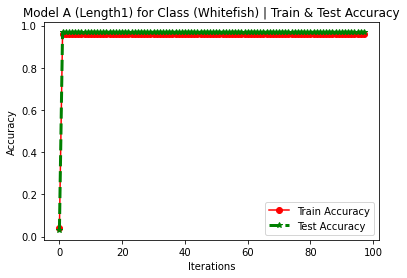

In [7]:
# Step 5 : Model A (Length1)

# Preparing data for model
# all_features:  'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight'
# already splitted train_feature, train_output, test_feature, test_output 

# feature = 'Length1'
train_feature = all_train_feature[:,1]
test_feature = all_test_feature[:,1]

# Adding a column of 1s to input_feature
train_feature = np.c_[np.ones(train_feature.shape[0]), train_feature]
test_feature = np.c_[np.ones(test_feature.shape[0]), test_feature]

# Normalizing input_feature
train_feature_norm = function_0(train_feature)
test_feature_norm = function_0(test_feature)

# Defining constants
D = train_feature_norm.shape[1]
w0 =  np.zeros([D,1])
learning_rate = 7e-2 # 7e-10
tolerance = 1 #1.4e4

# Training model A for all classes
all_fish_spec = ['Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']
for idx, target in enumerate(all_fish_spec):
    
    # Converting fish species to binary values
    train_output_binary = np.where(train_output == target,1,0)
    test_output_binary = np.where(test_output == target,1,0)
    
    # Print Model Performance
    print('*****************************************************************************')
    print('*****************************************************************************')
    print(f'\nPerformance of Model A (Length1) for Class ({target}):')

    # Training Binary Logistic Regression Model 
    weight, train_accuracy_history, test_accuracy_history = \
    function_3(train_feature_norm, train_output_binary, test_feature_norm, test_output_binary, w0, learning_rate, tolerance)


    # Print Model Performance 
    print(f'\nFinal Train Accuracy = {train_accuracy_history[-1]}; Final Test Accuracy = {test_accuracy_history[-1]};')

    # Plot Train & Test Accuracy
    k = train_accuracy_history.shape[0]
    plt.plot(np.arange(k), train_accuracy_history,'r-o', label='Train Accuracy')
    plt.plot(np.arange(k), test_accuracy_history,'g--*', label='Test Accuracy', linewidth=3)
    plt.title(f'Model A (Length1) for Class ({target}) | Train & Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'../results/Model A_{target}_Accuracy.png')
    plt.show()

### Step 5 : Model B (Length2)

*****************************************************************************
*****************************************************************************

Performance of Model B (Length2) for Class (Bream):

Final estimated weights = w0:[-6.03395063], w1:[-3.59279143]

Final Train Accuracy = 0.7795275590551181; Final Test Accuracy = 0.78125;


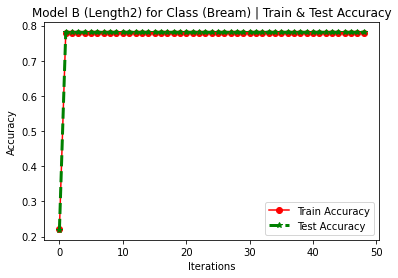

*****************************************************************************
*****************************************************************************

Performance of Model B (Length2) for Class (Parkki):

Final estimated weights = w0:[-11.38584571], w1:[-11.04553509]

Final Train Accuracy = 0.9291338582677166; Final Test Accuracy = 0.9375;


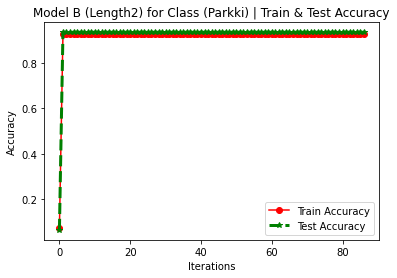

*****************************************************************************
*****************************************************************************

Performance of Model B (Length2) for Class (Perch):

Final estimated weights = w0:[-2.06845218], w1:[-2.30001174]

Final Train Accuracy = 0.6456692913385826; Final Test Accuracy = 0.65625;


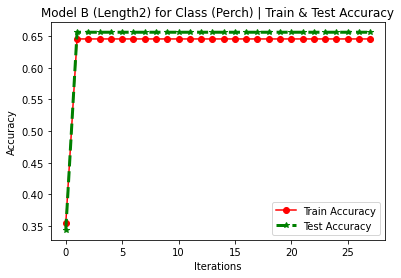

*****************************************************************************
*****************************************************************************

Performance of Model B (Length2) for Class (Pike):

Final estimated weights = w0:[-10.95866904], w1:[-5.94943827]

Final Train Accuracy = 0.8976377952755905; Final Test Accuracy = 0.875;


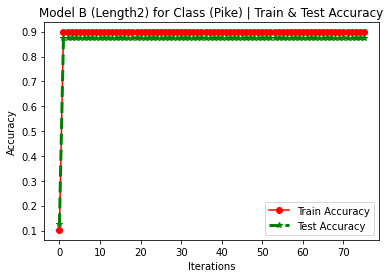

*****************************************************************************
*****************************************************************************

Performance of Model B (Length2) for Class (Roach):

Final estimated weights = w0:[-8.77710587], w1:[-8.96906678]

Final Train Accuracy = 0.8740157480314961; Final Test Accuracy = 0.875;


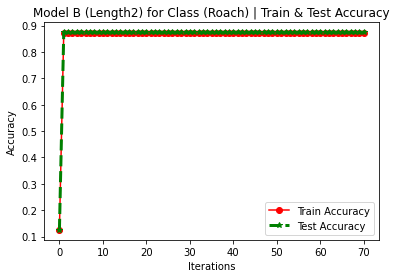

*****************************************************************************
*****************************************************************************

Performance of Model B (Length2) for Class (Smelt):

Final estimated weights = w0:[-10.47912795], w1:[-12.24729336]

Final Train Accuracy = 0.9133858267716536; Final Test Accuracy = 0.90625;


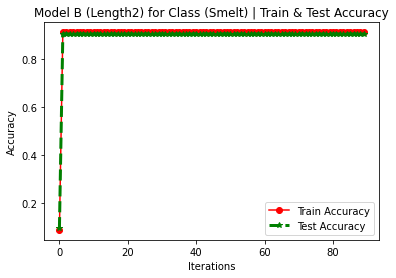

*****************************************************************************
*****************************************************************************

Performance of Model B (Length2) for Class (Whitefish):

Final estimated weights = w0:[-13.40435063], w1:[-11.53171155]

Final Train Accuracy = 0.9606299212598425; Final Test Accuracy = 0.96875;


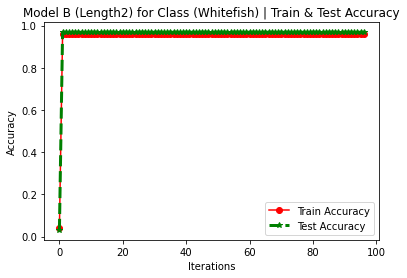

In [8]:
# Step 5 : Model B (Length2)

# Preparing data for model
# all_features:  'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight'
# already splitted train_feature, train_output, test_feature, test_output 

# feature = 'Length1'
train_feature = all_train_feature[:,2]
test_feature = all_test_feature[:,2]

# Adding a column of 1s to input_feature
train_feature = np.c_[np.ones(train_feature.shape[0]), train_feature]
test_feature = np.c_[np.ones(test_feature.shape[0]), test_feature]

# Normalizing input_feature
train_feature_norm = function_0(train_feature)
test_feature_norm = function_0(test_feature)

# Defining constants
D = train_feature_norm.shape[1]
w0 =  np.zeros([D,1])
learning_rate = 7e-2 # 7e-10
tolerance = 1 #1.4e4

# Training model A for all classes
all_fish_spec = ['Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']
for idx, target in enumerate(all_fish_spec):
    
    # Converting fish species to binary values
    train_output_binary = np.where(train_output == target,1,0)
    test_output_binary = np.where(test_output == target,1,0)

    
    # Print Model Performance
    print('*****************************************************************************')
    print('*****************************************************************************')  
    print(f'\nPerformance of Model B (Length2) for Class ({target}):')


    # Training Binary Logistic Regression Model 
    weight, train_accuracy_history, test_accuracy_history = \
    function_3(train_feature_norm, train_output_binary, test_feature_norm, test_output_binary, w0, learning_rate, tolerance)


    # Print Model Performance 
    print(f'\nFinal Train Accuracy = {train_accuracy_history[-1]}; Final Test Accuracy = {test_accuracy_history[-1]};')

    # Plot Train & Test Accuracy
    k = train_accuracy_history.shape[0]
    plt.plot(np.arange(k), train_accuracy_history,'r-o', label='Train Accuracy')
    plt.plot(np.arange(k), test_accuracy_history,'g--*', label='Test Accuracy', linewidth=3)
    plt.title(f'Model B (Length2) for Class ({target}) | Train & Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'../results/Model B_{target}_Accuracy.png')
    plt.show()

### Step 5 : Model C (Length3)

*****************************************************************************
*****************************************************************************

Performance of Model C (Length3) for Class (Bream):

Final estimated weights = w0:[-15.60873008], w1:[5.66544444]

Final Train Accuracy = 0.7795275590551181; Final Test Accuracy = 0.78125;


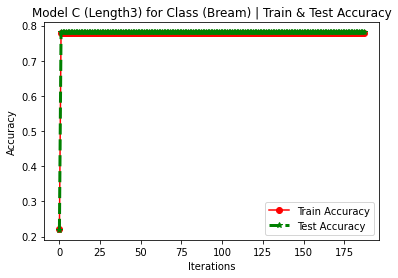

*****************************************************************************
*****************************************************************************

Performance of Model C (Length3) for Class (Parkki):

Final estimated weights = w0:[-11.94133168], w1:[-9.69266314]

Final Train Accuracy = 0.9291338582677166; Final Test Accuracy = 0.9375;


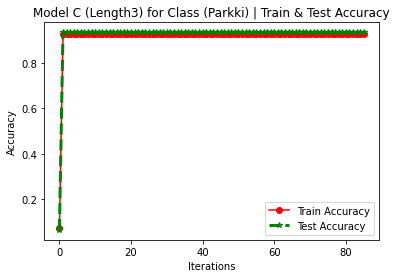

*****************************************************************************
*****************************************************************************

Performance of Model C (Length3) for Class (Perch):

Final estimated weights = w0:[-2.09989959], w1:[-2.74860527]

Final Train Accuracy = 0.6456692913385826; Final Test Accuracy = 0.65625;


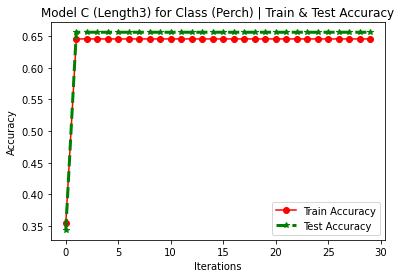

*****************************************************************************
*****************************************************************************

Performance of Model C (Length3) for Class (Pike):

Final estimated weights = w0:[-10.22459576], w1:[-8.77029672]

Final Train Accuracy = 0.8976377952755905; Final Test Accuracy = 0.875;


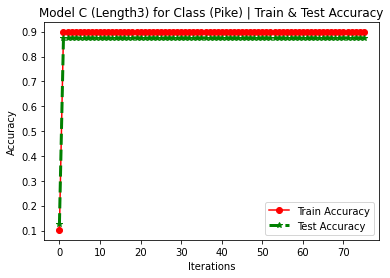

*****************************************************************************
*****************************************************************************

Performance of Model C (Length3) for Class (Roach):

Final estimated weights = w0:[-9.02240154], w1:[-8.91337357]

Final Train Accuracy = 0.8740157480314961; Final Test Accuracy = 0.875;


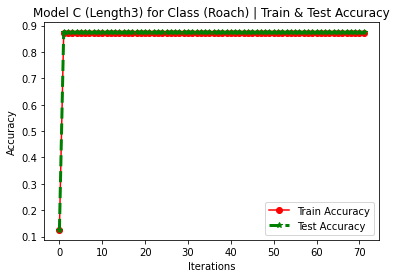

*****************************************************************************
*****************************************************************************

Performance of Model C (Length3) for Class (Smelt):

Final estimated weights = w0:[-10.88509709], w1:[-12.88357248]

Final Train Accuracy = 0.9133858267716536; Final Test Accuracy = 0.90625;


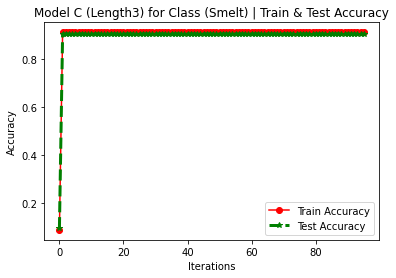

*****************************************************************************
*****************************************************************************

Performance of Model C (Length3) for Class (Whitefish):

Final estimated weights = w0:[-13.98412931], w1:[-11.14275158]

Final Train Accuracy = 0.9606299212598425; Final Test Accuracy = 0.96875;


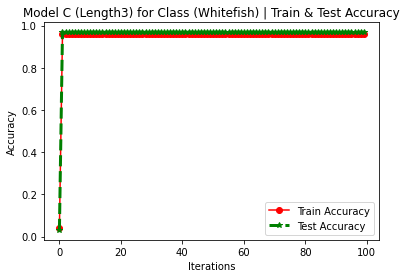

In [9]:
# Step 5 : Model C (Length3)

# Preparing data for model
# all_features:  'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight'
# already splitted train_feature, train_output, test_feature, test_output 

# feature = 'Length3'
train_feature = all_train_feature[:,3]
test_feature = all_test_feature[:,3]

# Adding a column of 1s to input_feature
train_feature = np.c_[np.ones(train_feature.shape[0]), train_feature]
test_feature = np.c_[np.ones(test_feature.shape[0]), test_feature]

# Normalizing input_feature
train_feature_norm = function_0(train_feature)
test_feature_norm = function_0(test_feature)

# Defining constants
D = train_feature_norm.shape[1]
w0 =  np.zeros([D,1])
learning_rate = 7e-2 # 7e-10
tolerance = 1 #1.4e4

# Training model A for all classes
all_fish_spec = ['Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']
for idx, target in enumerate(all_fish_spec):
    
    # Converting fish species to binary values
    train_output_binary = np.where(train_output == target,1,0)
    test_output_binary = np.where(test_output == target,1,0)

    # Print Model Performance
    print('*****************************************************************************')
    print('*****************************************************************************')
    print(f'\nPerformance of Model C (Length3) for Class ({target}):')
    
    
    # Training Binary Logistic Regression Model 
    weight, train_accuracy_history, test_accuracy_history = \
    function_3(train_feature_norm, train_output_binary, test_feature_norm, test_output_binary, w0, learning_rate, tolerance)


    # Print Model Performance 
    print(f'\nFinal Train Accuracy = {train_accuracy_history[-1]}; Final Test Accuracy = {test_accuracy_history[-1]};')

    # Plot Train & Test Accuracy
    k = train_accuracy_history.shape[0]
    plt.plot(np.arange(k), train_accuracy_history,'r-o', label='Train Accuracy')
    plt.plot(np.arange(k), test_accuracy_history,'g--*', label='Test Accuracy', linewidth=3)
    plt.title(f'Model C (Length3) for Class ({target}) | Train & Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'../results/Model C_{target}_Accuracy.png')
    plt.show()

### Step 5 : Model D (Height)

*****************************************************************************
*****************************************************************************

Performance of Model D (Height) for Class (Bream):

Final estimated weights = w0:[-6.04024491], w1:[-3.5692755]

Final Train Accuracy = 0.7795275590551181; Final Test Accuracy = 0.78125;


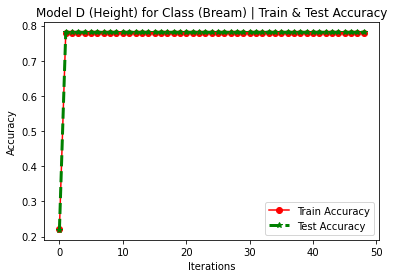

*****************************************************************************
*****************************************************************************

Performance of Model D (Height) for Class (Parkki):

Final estimated weights = w0:[-11.40151096], w1:[-10.98670707]

Final Train Accuracy = 0.9291338582677166; Final Test Accuracy = 0.9375;


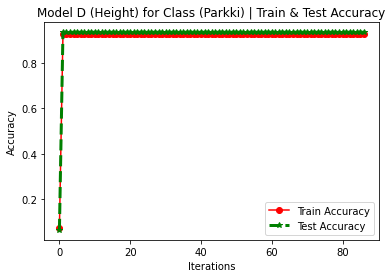

*****************************************************************************
*****************************************************************************

Performance of Model D (Height) for Class (Perch):

Final estimated weights = w0:[-1.99359106], w1:[-1.44755514]

Final Train Accuracy = 0.6456692913385826; Final Test Accuracy = 0.65625;


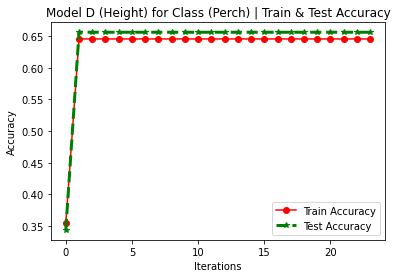

*****************************************************************************
*****************************************************************************

Performance of Model D (Height) for Class (Pike):

Final estimated weights = w0:[-10.12676599], w1:[-7.6388914]

Final Train Accuracy = 0.8976377952755905; Final Test Accuracy = 0.875;


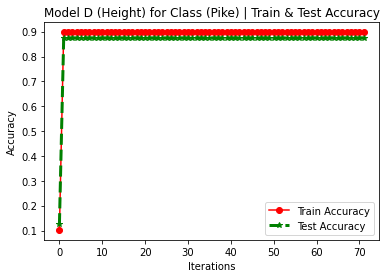

*****************************************************************************
*****************************************************************************

Performance of Model D (Height) for Class (Roach):

Final estimated weights = w0:[-8.78285193], w1:[-8.74025631]

Final Train Accuracy = 0.8740157480314961; Final Test Accuracy = 0.875;


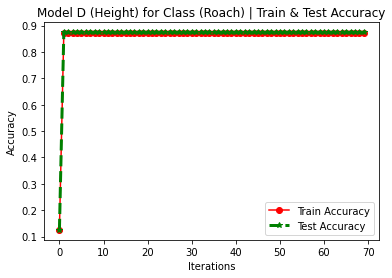

*****************************************************************************
*****************************************************************************

Performance of Model D (Height) for Class (Smelt):

Final estimated weights = w0:[-10.45276034], w1:[-13.01027307]

Final Train Accuracy = 0.9133858267716536; Final Test Accuracy = 0.90625;


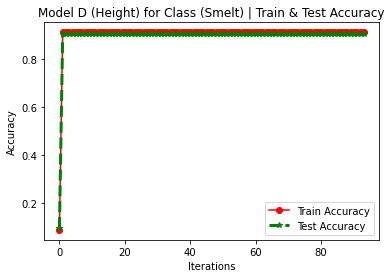

*****************************************************************************
*****************************************************************************

Performance of Model D (Height) for Class (Whitefish):

Final estimated weights = w0:[-13.4515785], w1:[-11.13478694]

Final Train Accuracy = 0.9606299212598425; Final Test Accuracy = 0.96875;


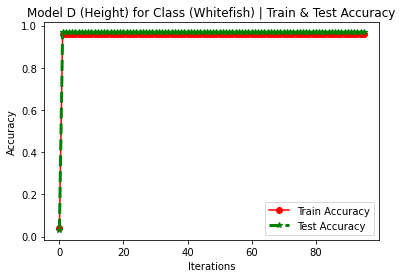

In [10]:
# Step 5 : Model D (Height)

# Preparing data for model
# all_features:  'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight'
# already splitted train_feature, train_output, test_feature, test_output 

# feature = 'Height'
train_feature = all_train_feature[:,4]
test_feature = all_test_feature[:,4]

# Adding a column of 1s to input_feature
train_feature = np.c_[np.ones(train_feature.shape[0]), train_feature]
test_feature = np.c_[np.ones(test_feature.shape[0]), test_feature]

# Normalizing input_feature
train_feature_norm = function_0(train_feature)
test_feature_norm = function_0(test_feature)

# Defining constants
D = train_feature_norm.shape[1]
w0 =  np.zeros([D,1])
learning_rate = 7e-2 # 7e-10
tolerance = 1 #1.4e4

# Training model A for all classes
all_fish_spec = ['Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']
for idx, target in enumerate(all_fish_spec):
    
    # Converting fish species to binary values
    train_output_binary = np.where(train_output == target,1,0)
    test_output_binary = np.where(test_output == target,1,0)

    # Print Model Performance
    print('*****************************************************************************')
    print('*****************************************************************************')
    print(f'\nPerformance of Model D (Height) for Class ({target}):')

    # Training Binary Logistic Regression Model 
    weight, train_accuracy_history, test_accuracy_history = \
    function_3(train_feature_norm, train_output_binary, test_feature_norm, test_output_binary, w0, learning_rate, tolerance)


    # Print Model Performance     
    print(f'\nFinal Train Accuracy = {train_accuracy_history[-1]}; Final Test Accuracy = {test_accuracy_history[-1]};')

    # Plot Train & Test Accuracy
    k = train_accuracy_history.shape[0]
    plt.plot(np.arange(k), train_accuracy_history,'r-o', label='Train Accuracy')
    plt.plot(np.arange(k), test_accuracy_history,'g--*', label='Test Accuracy', linewidth=3)
    plt.title(f'Model D (Height) for Class ({target}) | Train & Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'../results/Model D_{target}_Accuracy.png')
    plt.show()

### Step 5 : Model E (Width)

*****************************************************************************
*****************************************************************************

Performance of Model E (Width) for Class (Bream):

Final estimated weights = w0:[-9.00146912], w1:[-0.66468558]

Final Train Accuracy = 0.7795275590551181; Final Test Accuracy = 0.78125;


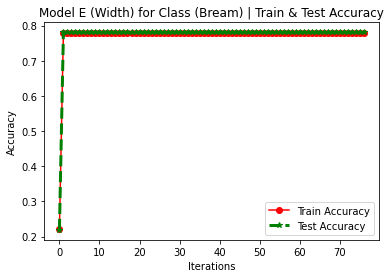

*****************************************************************************
*****************************************************************************

Performance of Model E (Width) for Class (Parkki):

Final estimated weights = w0:[-13.96899182], w1:[-10.0239677]

Final Train Accuracy = 0.9291338582677166; Final Test Accuracy = 0.9375;


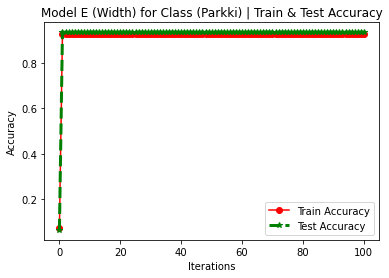

*****************************************************************************
*****************************************************************************

Performance of Model E (Width) for Class (Perch):

Final estimated weights = w0:[-2.18990142], w1:[-1.82847357]

Final Train Accuracy = 0.6456692913385826; Final Test Accuracy = 0.65625;


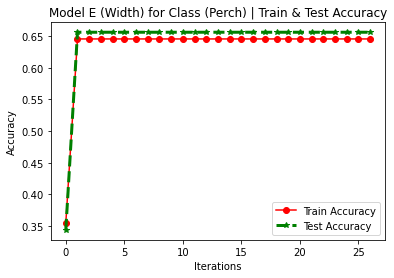

*****************************************************************************
*****************************************************************************

Performance of Model E (Width) for Class (Pike):

Final estimated weights = w0:[-15.20998197], w1:[-2.30261008]

Final Train Accuracy = 0.8976377952755905; Final Test Accuracy = 0.875;


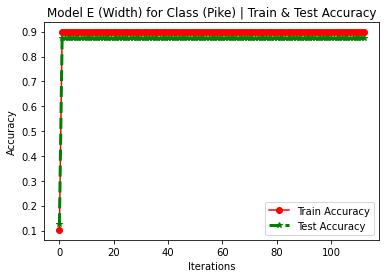

*****************************************************************************
*****************************************************************************

Performance of Model E (Width) for Class (Roach):

Final estimated weights = w0:[-10.5657302], w1:[-9.2992303]

Final Train Accuracy = 0.8740157480314961; Final Test Accuracy = 0.875;


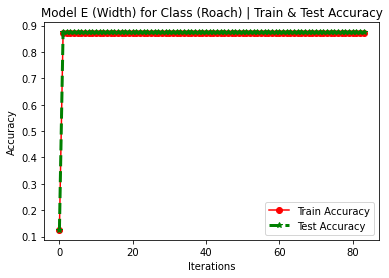

*****************************************************************************
*****************************************************************************

Performance of Model E (Width) for Class (Smelt):

Final estimated weights = w0:[-12.99269427], w1:[-11.52041059]

Final Train Accuracy = 0.9133858267716536; Final Test Accuracy = 0.90625;


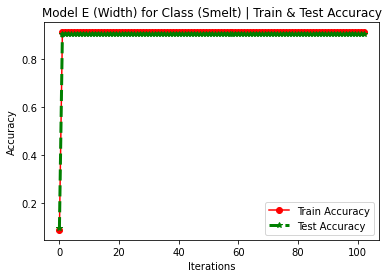

*****************************************************************************
*****************************************************************************

Performance of Model E (Width) for Class (Whitefish):

Final estimated weights = w0:[-16.53156159], w1:[-9.19601926]

Final Train Accuracy = 0.9606299212598425; Final Test Accuracy = 0.96875;


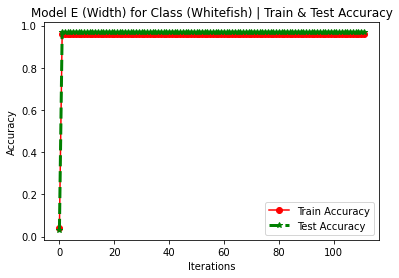

In [11]:
# Step 5 : Model E (Width)

# Preparing data for model
# all_features:  'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight'
# already splitted train_feature, train_output, test_feature, test_output 

# feature = 'Width'
train_feature = all_train_feature[:,5]
test_feature = all_test_feature[:,5]

# Adding a column of 1s to input_feature
train_feature = np.c_[np.ones(train_feature.shape[0]), train_feature]
test_feature = np.c_[np.ones(test_feature.shape[0]), test_feature]

# Normalizing input_feature
train_feature_norm = function_0(train_feature)
test_feature_norm = function_0(test_feature)

# Defining constants
D = train_feature_norm.shape[1]
w0 =  np.zeros([D,1])
learning_rate = 7e-2 # 7e-10
tolerance = 1 #1.4e4

# Training model A for all classes
all_fish_spec = ['Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']
for idx, target in enumerate(all_fish_spec):
    
    # Converting fish species to binary values
    train_output_binary = np.where(train_output == target,1,0)
    test_output_binary = np.where(test_output == target,1,0)

    
    # Print Model Performance
    print('*****************************************************************************')
    print('*****************************************************************************')
    print(f'\nPerformance of Model E (Width) for Class ({target}):')
    
    # Training Binary Logistic Regression Model 
    weight, train_accuracy_history, test_accuracy_history = \
    function_3(train_feature_norm, train_output_binary, test_feature_norm, test_output_binary, w0, learning_rate, tolerance)


    # Print Model Performance 
    print(f'\nFinal Train Accuracy = {train_accuracy_history[-1]}; Final Test Accuracy = {test_accuracy_history[-1]};')

    # Plot Train & Test Accuracy
    k = train_accuracy_history.shape[0]
    plt.plot(np.arange(k), train_accuracy_history,'r-o', label='Train Accuracy')
    plt.plot(np.arange(k), test_accuracy_history,'g--*', label='Test Accuracy', linewidth=3)
    plt.title(f'Model E (Width) for Class ({target}) | Train & Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'../results/Model E_{target}_Accuracy.png')
    plt.show()

### Step 5 : Model F (Weight)

*****************************************************************************
*****************************************************************************

Performance of Model F (Weight) for Class (Bream):

Final estimated weights = w0:[-5.85079029], w1:[-3.99703823]

Final Train Accuracy = 0.7795275590551181; Final Test Accuracy = 0.78125;


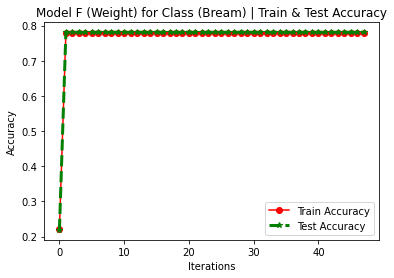

*****************************************************************************
*****************************************************************************

Performance of Model F (Weight) for Class (Parkki):

Final estimated weights = w0:[-11.45102195], w1:[-11.11922031]

Final Train Accuracy = 0.9291338582677166; Final Test Accuracy = 0.9375;


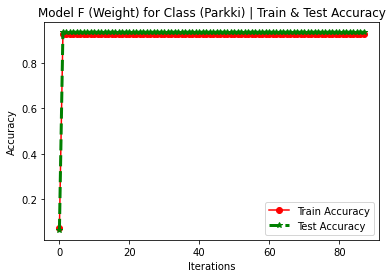

*****************************************************************************
*****************************************************************************

Performance of Model F (Weight) for Class (Perch):

Final estimated weights = w0:[-2.01697312], w1:[-2.00081935]

Final Train Accuracy = 0.6456692913385826; Final Test Accuracy = 0.65625;


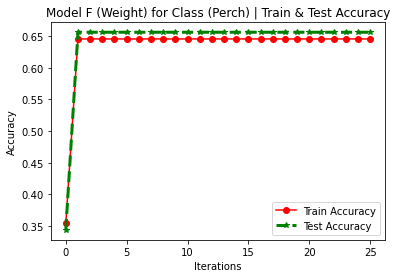

*****************************************************************************
*****************************************************************************

Performance of Model F (Weight) for Class (Pike):

Final estimated weights = w0:[-11.20990547], w1:[-5.66170887]

Final Train Accuracy = 0.8976377952755905; Final Test Accuracy = 0.875;


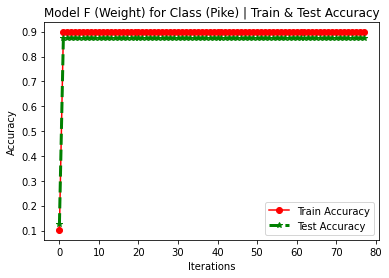

*****************************************************************************
*****************************************************************************

Performance of Model F (Weight) for Class (Roach):

Final estimated weights = w0:[-8.78421498], w1:[-9.00305304]

Final Train Accuracy = 0.8740157480314961; Final Test Accuracy = 0.875;


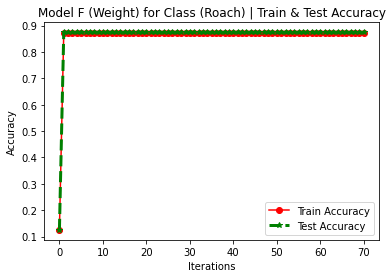

*****************************************************************************
*****************************************************************************

Performance of Model F (Weight) for Class (Smelt):

Final estimated weights = w0:[-10.53056271], w1:[-12.16560132]

Final Train Accuracy = 0.9133858267716536; Final Test Accuracy = 0.90625;


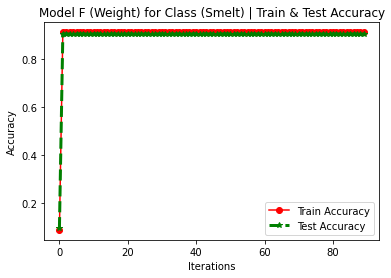

*****************************************************************************
*****************************************************************************

Performance of Model F (Weight) for Class (Whitefish):

Final estimated weights = w0:[-13.49080251], w1:[-11.55737909]

Final Train Accuracy = 0.9606299212598425; Final Test Accuracy = 0.96875;


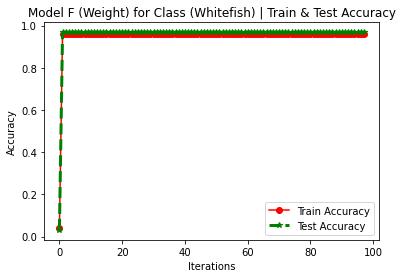

In [12]:
# Step 5 : Model F (Weight)

# Preparing data for model
# all_features:  'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight'
# already splitted train_feature, train_output, test_feature, test_output 

# feature = 'Weight'
train_feature = all_train_feature[:,0]
test_feature = all_test_feature[:,0]

# Adding a column of 1s to input_feature
train_feature = np.c_[np.ones(train_feature.shape[0]), train_feature]
test_feature = np.c_[np.ones(test_feature.shape[0]), test_feature]

# Normalizing input_feature
train_feature_norm = function_0(train_feature)
test_feature_norm = function_0(test_feature)

# Defining constants
D = train_feature_norm.shape[1]
w0 =  np.zeros([D,1])
learning_rate = 7e-2 # 7e-10
tolerance = 1 #1.4e4

# Training model A for all classes
all_fish_spec = ['Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']
for idx, target in enumerate(all_fish_spec):
    
    # Converting fish species to binary values
    train_output_binary = np.where(train_output == target,1,0)
    test_output_binary = np.where(test_output == target,1,0)

    
    # Print Model Performance
    print('*****************************************************************************')
    print('*****************************************************************************')
    print(f'\nPerformance of Model F (Weight) for Class ({target}):')
    
    # Training Binary Logistic Regression Model 
    weight, train_accuracy_history, test_accuracy_history = \
    function_3(train_feature_norm, train_output_binary, test_feature_norm, test_output_binary, w0, learning_rate, tolerance)


    # Print Model Performance 
    print(f'\nFinal Train Accuracy = {train_accuracy_history[-1]}; Final Test Accuracy = {test_accuracy_history[-1]};')

    # Plot Train & Test Accuracy
    k = train_accuracy_history.shape[0]
    plt.plot(np.arange(k), train_accuracy_history,'r-o', label='Train Accuracy')
    plt.plot(np.arange(k), test_accuracy_history,'g--*', label='Test Accuracy', linewidth=3)
    plt.title(f'Model F (Weight) for Class ({target}) | Train & Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'../results/Model F_{target}_Accuracy.png')
    plt.show()